In [2]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import warnings #to remove the warnings
import random
import sys
sys.path.append('../../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from subsampleData import subsample
from models import trainModels
from genFillNulls import *
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler





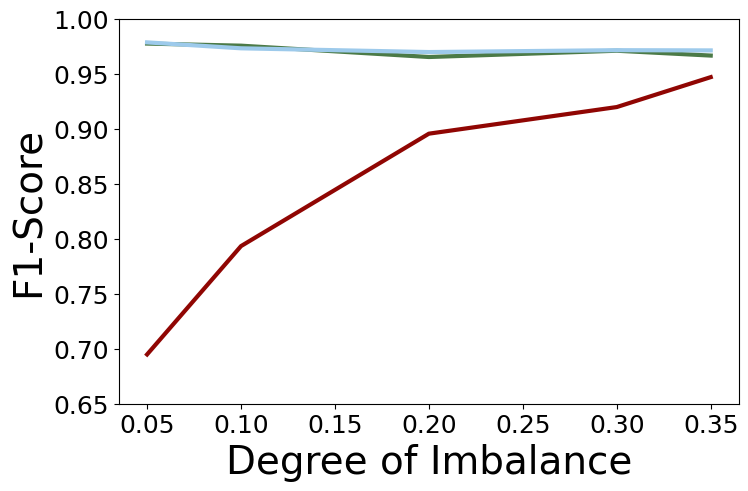

In [15]:
'''
WBC
-------
RAW DATA
[0.9456638262506314, 0.9537830712303423, 0.9519177506340186, 0.9313956713120032, 0.9519177506340186] -> 0.9469
[0.9106121575865735, 0.925621054552089, 0.9235881155881156, 0.9086864235769785, 0.9301701261701263] -> 0.9197
[0.8770965952430483, 0.9058167812579578, 0.9070680712476378, 0.8749210369953403, 0.912400028591979] -> 0.8955
[0.7909973359973359, 0.8516233766233766, 0.7872222222222222, 0.741919191919192, 0.7947979797979798] -> 0.7933
[0.7006349206349206, 0.6666666666666667, 0.75, 0.6333333333333333, 0.7233333333333334] -> 0.6948
SMOTE DATA
[0.9644141871301887, 0.9660464651519189, 0.9708025595169572, 0.9604697142214047, 0.9707497053943357] -> 0.9665
[0.9611902866714788, 0.9718002553647652, 0.9765718464350609, 0.9698234273625375, 0.975352163442051] -> 0.9709
[0.9494955105164327, 0.9684521860248323, 0.9722259052351871, 0.9672028290277032, 0.9684521860248323] -> 0.9652
[0.9658738540149248, 0.9786683142366446, 0.9755480694850336, 0.9787420964356093, 0.9786683142366446] -> 0.9755
[0.9680770803315992, 0.9821925681694393, 0.9790150880214121, 0.9764449121060143, 0.9810692661840685] -> 0.9774
Synthetic DATA
[0.9702172486517755, 0.978508764324731, 0.976391764893212, 0.9532127158959771, 0.9774906659921131] -> 0.9712
[0.9725292640279999, 0.9752294150384948, 0.977638064143686, 0.956567527331275, 0.9752294150384948] -> 0.9714
[0.9726311781366965, 0.9764289485686654, 0.978889966341938, 0.9442572500132614, 0.9764536429753822] -> 0.9697
[0.9749558584931475, 0.9809846275785127, 0.9821823620446128, 0.94507749808678, 0.9821823620446128] -> 0.9731
[0.9772022263574929, 0.9800216383556176, 0.982294384766295, 0.9706369562549337, 0.982294384766295] -> 0.9785
'''
raw_wbc = [.9469, 0.9197, 0.8955, 0.7933, 0.6948]
smote_wbc = [.9665, 0.9709, 0.9652, 0.9755, 0.9774]
syn_wbc = [.9712, 0.9714, 0.9697, 0.9731, 0.9785]

wbc_x_vals = [0.35, 0.3, 0.2, 0.1, 0.05]

plt.plot(wbc_x_vals, raw_wbc,  label='Unbalanced', color='#900603', linewidth=2)
plt.plot(wbc_x_vals, smote_wbc, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(wbc_x_vals, syn_wbc, label='Synthetic', color='#9DCAEB', linewidth=2)
#plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Degree of Imbalance")
plt.ylabel("F1-Score")
plt.ylim(0.65,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
#plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



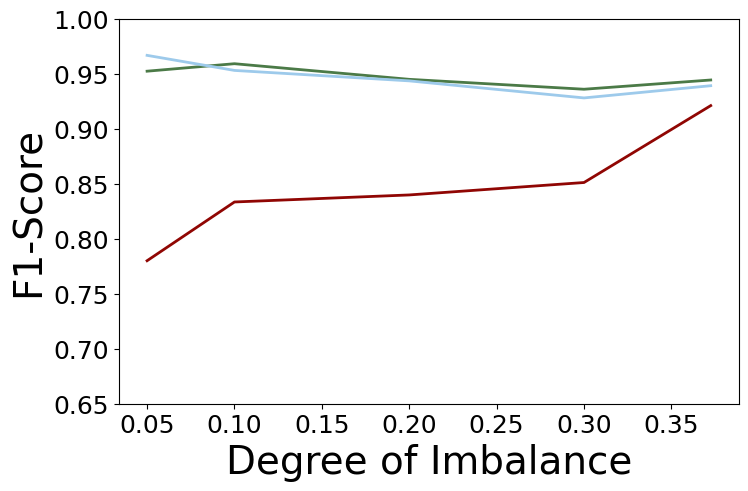

In [4]:
'''
WDBC
-------
RAW DATA
[0.9122090677629979, 0.9180165958072933, 0.9390420606251875, 0.9037729964676375, 0.9319940619033076] -> 0.921
[0.7896810207336523, 0.8551082251082252, 0.8966836062488236, 0.8551540247192421, 0.858723725534871] -> 0.8511
[0.7709279609279609, 0.83753663003663, 0.8876556776556777, 0.8360347985347986, 0.8667932067932067] -> 0.8398
[0.7928571428571429, 0.7814285714285714, 0.9085714285714286, 0.8388095238095238, 0.8454761904761904] -> 0.8334
[0.76, 0.78, 0.8666666666666668, 0.6799999999999999, 0.8133333333333332] -> 0.78
SMOTE DATA
[0.9214178963853182, 0.9400344751241334, 0.9552292874446069, 0.9464674542584012, 0.9583191411007629] -> 0.9443
[0.8473811042550791, 0.9537006190169072, 0.9619750430704055, 0.9567351432002381, 0.9595107736250158] -> 0.9359
[0.8516792480211842, 0.9617238899427163, 0.9665005202551026, 0.9751834218938213, 0.9695345235003818] -> 0.9449
[0.9114155272761544, 0.9579899438996489, 0.97635457077089, 0.9864438662084811, 0.9634371994639988] -> 0.9591
[0.8988345810546517, 0.9551781001752454, 0.9738028588445504, 0.9724109166082926, 0.9612869492013241] -> 0.9523
Synthetic DATA
[0.949334831171958, 0.9220777822726036, 0.9492518743023263, 0.9248132216811211, 0.949969095717375] -> 0.9391
[0.9418073638064763, 0.8872302447301547, 0.9313681302521661, 0.9332708759941291, 0.9462815623648266] -> 0.928
[0.9626893403060874, 0.8897906883987522, 0.9450402439419202, 0.9607580156455497, 0.9593658279490922] -> 0.9435
[0.985352463473243, 0.9181798902397352, 0.9791264711557013, 0.9022304982663748, 0.9801576582784376] -> 0.953
[0.9871525689187501, 0.918772036655905, 0.9810983330558114, 0.9594622518788061, 0.9869806859969878] -> 0.9667
'''
raw_wdbc = [.921, 0.8511, 0.8398, 0.8334, 0.78]
smote_wdbc = [.9443, 0.9359, 0.9449, 0.9591, 0.9523]
syn_wdbc = [.9391, 0.928, 0.9435, 0.953, 0.9667]

wdbc_x_vals = [0.3725, 0.3, 0.2, 0.1, 0.05]


plt.plot(wdbc_x_vals, raw_wdbc,  label='Unbalanced', color='#900603', linewidth=2)
plt.plot(wdbc_x_vals, smote_wdbc, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(wdbc_x_vals, syn_wdbc, label='Synthetic', color='#9DCAEB', linewidth=2)
#plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Degree of Imbalance")
plt.ylabel("F1-Score")
plt.ylim(0.65,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
#plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



plt.show()

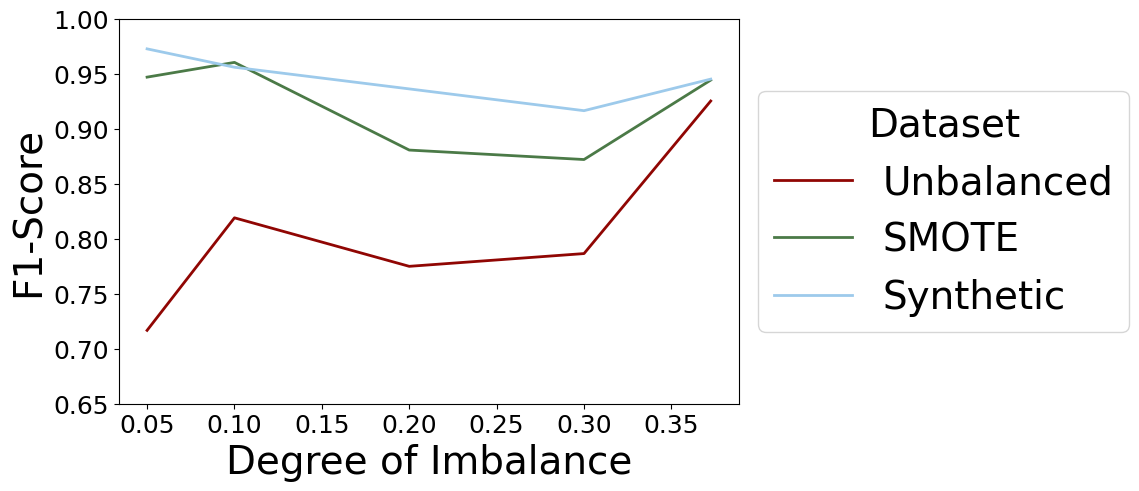

In [5]:
'''
WDBC_Stripped
-------
RAW DATA
[0.8992564070471047, 0.9300778083704913, 0.9443171443795381, 0.9012426769309856, 0.9510689301245172] -> 0.9252
[0.48684065934065934, 0.8771842650103521, 0.8757556935817806, 0.8261799756307765, 0.8665519860256701] -> 0.7865
[0.4105555555555556, 0.8656593406593407, 0.8656593406593407, 0.843783667313079, 0.888846153846154] -> 0.7749
[0.7723809523809525, 0.8538095238095238, 0.8538095238095238, 0.7804761904761904, 0.8347619047619046] -> 0.819
[0.62, 0.8333333333333333, 0.7333333333333333, 0.6966666666666667, 0.7] -> 0.7167
SMOTE DATA
[0.9272438920008991, 0.9470378203337043, 0.9559180634731559, 0.940160748356195, 0.9507796979387526] -> 0.9442
[0.5875207791354, 0.9469455085107402, 0.9461586878629131, 0.9357061781715373, 0.9436610348044676] -> 0.872
[0.586563647608346, 0.9537805892134426, 0.9514653398195749, 0.952825846163511, 0.9584505513737342] -> 0.8806
[0.9402758872831406, 0.9613903120677358, 0.9619430027253444, 0.9697693282985584, 0.9678921798316085] -> 0.9603
[0.903926539151057, 0.9527837156248891, 0.9517877146536741, 0.9675880279438293, 0.9585931036450267] -> 0.9469
Synthetic DATA
[0.9352504181331787, 0.9506578156063407, 0.9617938412100321, 0.9257054575640791, 0.9522673827459318] -> 0.9451
[0.8451304347826086, 0.9375183287026303, 0.9405354073519254, 0.9302781059445691, 0.9285215324669025] -> 0.9164
[0.8893617021276595, 0.9367182112815915, 0.9418811957318907, 0.9655617186221084, 0.9475200420051844] -> 0.9362
[0.977593610892518, 0.960698993471477, 0.9672173528231796, 0.9011149811631143, 0.9727632386412601] -> 0.9559
[0.9873837601747072, 0.9650312650051823, 0.9695011819778909, 0.9622770529812785, 0.9786589031281743] -> 0.9726
'''

raw_wdbc_stripped = [.9252, 0.7865, 0.7749, 0.819, 0.7167]
smote_wdbc_stripped = [.9442, 0.872, 0.8806, 0.9603, 0.9469]
syn_wdbc_stripped = [.9451, 0.9164, 0.9362, 0.9559, 0.9726]

wdbc_x_vals_stripped = [0.3725, 0.3, 0.2, 0.1, 0.05]



plt.plot(wdbc_x_vals_stripped, raw_wdbc_stripped,  label='Unbalanced', color='#900603', linewidth=2)
plt.plot(wdbc_x_vals_stripped, smote_wdbc_stripped, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(wdbc_x_vals_stripped, syn_wdbc_stripped, label='Synthetic', color='#9DCAEB', linewidth=2)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Degree of Imbalance")
plt.ylabel("F1-Score")
plt.ylim(0.65,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

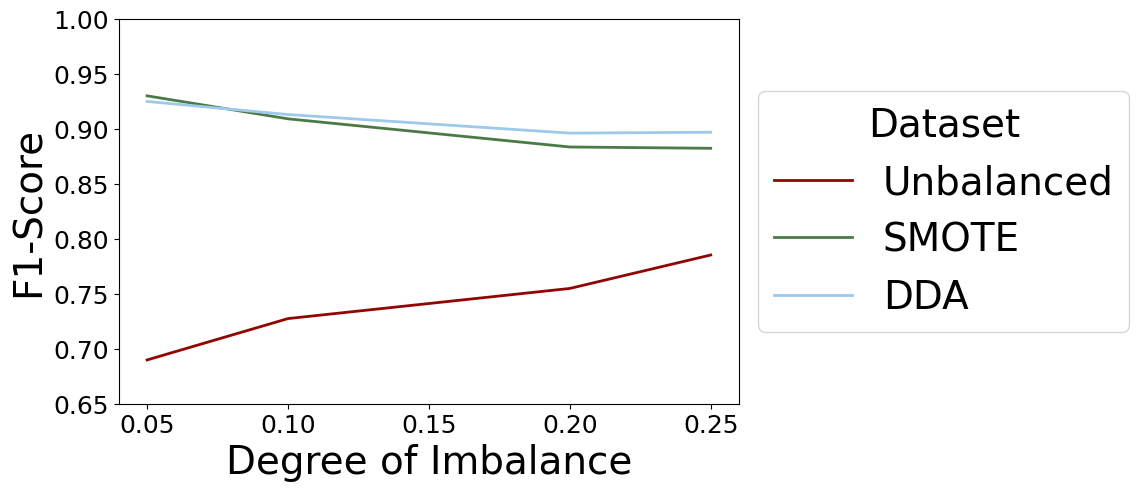

In [16]:
'''
Surgical
RAW DATA
[0.710496850770549, 0.7666791408315122, 0.8673518205679743, 0.755258939169909, 0.8259761310769884] -> 0.7852
[0.669541516046207, 0.7325853126283131, 0.8576917932912371, 0.7164747967928197, 0.7978973097104706] -> 0.7548
[0.6151208899400098, 0.6845574485624548, 0.8353249665608287, 0.7259209965776457, 0.7760955650763771] -> 0.7274
[0.6040905158229999, 0.604591750776977, 0.8005667975435417, 0.6890939741878117, 0.7506253673166446] -> 0.6898
SMOTE DATA
[0.8539621379190254, 0.8700226424398277, 0.8971396608154396, 0.899497322440484, 0.8905721573352763] -> 0.8822
[0.8560955879170606, 0.8709181481435959, 0.8952969379544017, 0.9066532098909363, 0.8877974749939748] -> 0.8834
[0.8856417304877257, 0.8862483196215818, 0.9112623316537558, 0.9485397190989424, 0.9131022732488983] -> 0.909
[0.9221241096231113, 0.9022410651987578, 0.9244186060716604, 0.9615556058923598, 0.9393676858034492] -> 0.9299
Synthetic DATA
[0.8572625397778418, 0.8798993904861325, 0.9093949663454575, 0.9280918525329384, 0.9091039674690599] -> 0.8968
[0.8515695167344427, 0.8794626885070078, 0.9092649014714264, 0.934317282705253, 0.9054436175682504] -> 0.896
[0.8827638258717521, 0.8876189662282089, 0.9193364013144787, 0.955649482790126, 0.9193000390778121] -> 0.9129
[0.919663248317421, 0.8927488825622356, 0.9302393768228445, 0.9446943954704355, 0.9366006466098827] -> 0.9248
'''
raw_surgical = [.7852, 0.7548, 0.7274, 0.6898]
smote_surgical = [.8822, 0.8834, 0.909, 0.9299]
syn_surgical = [.8968, .896, .9129, .9248]

surgical_x_vals = [0.25, 0.2, 0.1, 0.05]


plt.plot(surgical_x_vals, raw_surgical, label='Unbalanced', color='#900603', linewidth=2)
plt.plot(surgical_x_vals, smote_surgical, label='SMOTE', color='#4B7A47', linewidth=2)
plt.plot(surgical_x_vals, syn_surgical, label='DDA', color='#9DCAEB', linewidth=2)
plt.xlabel("Degree of Imbalance")
plt.ylabel("F1-Score")
plt.ylim(0.65,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [7]:
print('{:.03f} - {}'.format(np.mean(raw_wbc), raw_wbc))
print('{:.03f} - {}'.format(np.mean(smote_wbc), smote_wbc))
print('{:.03f} - {}'.format(np.mean(syn_wbc), syn_wbc))
print('-'*40)
print('{:.03f} - {}'.format(np.mean(raw_wdbc), raw_wdbc))
print('{:.03f} - {}'.format(np.mean(smote_wdbc), smote_wdbc))
print('{:.03f} - {}'.format(np.mean(syn_wdbc), syn_wdbc))
print('-'*40)
print('{:.03f} - {}'.format(np.mean(raw_wdbc_stripped), raw_wdbc_stripped))
print('{:.03f} - {}'.format(np.mean(smote_wdbc_stripped), smote_wdbc_stripped))
print('{:.03f} - {}'.format(np.mean(syn_wdbc_stripped), syn_wdbc_stripped))
print('-'*40)
print('{:.03f} - {}'.format(np.mean(raw_surgical), raw_surgical))
print('{:.03f} - {}'.format(np.mean(smote_surgical), smote_surgical))
print('{:.03f} - {}'.format(np.mean(syn_surgical), syn_surgical))







print(((0.973 + 0.946 + 0.908) - (0.850 + 0.845 + 0.739)) / 3 * 100)
print(((0.973 + 0.946 + 0.908) - (0.971 + 0.947 + 0.901)) / 3 * 100)

0.850 - [0.9469, 0.9197, 0.8955, 0.7933, 0.6948]
0.971 - [0.9665, 0.9709, 0.9652, 0.9755, 0.9774]
0.973 - [0.9712, 0.9714, 0.9697, 0.9731, 0.9785]
----------------------------------------
0.845 - [0.921, 0.8511, 0.8398, 0.8334, 0.78]
0.947 - [0.9443, 0.9359, 0.9449, 0.9591, 0.9523]
0.946 - [0.9391, 0.928, 0.9435, 0.953, 0.9667]
----------------------------------------
0.804 - [0.9252, 0.7865, 0.7749, 0.819, 0.7167]
0.921 - [0.9442, 0.872, 0.8806, 0.9603, 0.9469]
0.945 - [0.9451, 0.9164, 0.9362, 0.9559, 0.9726]
----------------------------------------
0.739 - [0.7852, 0.7548, 0.7274, 0.6898]
0.901 - [0.8822, 0.8834, 0.909, 0.9299]
0.908 - [0.8968, 0.896, 0.9129, 0.9248]
13.100000000000009
0.26666666666666694


0.92402
0.93726
0.95174
0.027720000000000078
0.014480000000000048


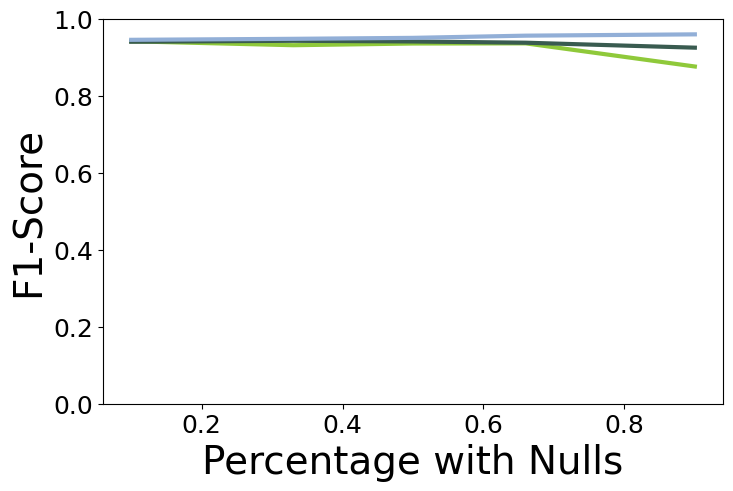

In [8]:
removalColor = '#8FC93A'
meanColor = '#395B50'
synColor = '#92AFD7'
'''
WBC
-------
RAW DATA
WBC
[0.947214406831041, 0.9494539052544628, 0.9449963240129904, 0.9181600355771558, 0.9471283238591139] ==> 0.9414
[0.9413569518716578, 0.9371675626689366, 0.9383774795184532, 0.9011364599434678, 0.9381819760971434] ==> 0.9312
[0.9451452991452992, 0.9369691902300599, 0.9334118779770952, 0.9252750437967828, 0.9373644471470557] ==> 0.9356
[0.9365978672170623, 0.9434442724458204, 0.9495700034399726, 0.9023582239913509, 0.9481811145510836] ==> 0.9360
[0.9357142857142857, 0.8957142857142857, 0.8266666666666665, 0.8557142857142859, 0.8657142857142857] ==> 0.8759
----------
[0.9423162803582972, 0.9504912633949901, 0.9508565839913137, 0.907000168282585, 0.9504912633949901] ==> 0.9402
[0.9463244836396096, 0.9505937919179626, 0.9508565839913137, 0.9132548813991999, 0.9526346082444933] ==> 0.9427
[0.9463244836396096, 0.9502369007803791, 0.9574112228681411, 0.9000819619861513, 0.9502369007803791] ==> 0.9409
[0.944202034660018, 0.9478915252405408, 0.9528101039747001, 0.895930898895859, 0.9478915252405408] ==> 0.9377
[0.9327654636322613, 0.9385060483461973, 0.9434979140592408, 0.8681215574092539, 0.9413396290818067] ==> 0.9248
----------
[0.9485317152502025, 0.956258501987099, 0.9541394151863644, 0.9085831460383889, 0.9583843523272352] ==> 0.9452
[0.9466591662305948, 0.9582192863008245, 0.9605904432742521, 0.9172930099576064, 0.956336933359648] ==> 0.9478
[0.9507442002442001, 0.954131003310976, 0.9580651907489998, 0.9323626832618507, 0.9562426171872958] ==> 0.9503
[0.9567850165707309, 0.963216974301284, 0.9592952447754881, 0.9373607367124258, 0.9633694045041343] ==> 0.9560
[0.9572458429912846, 0.9647070957323368, 0.9686447100579363, 0.9395585493572651, 0.9668347553068051] ==> 0.9594
'''
removal_wbc = [.9414, 0.9312, 0.9356, 0.9360, 0.8759]
mean_wbc = [.9402, 0.9427, 0.9409, 0.9377, 0.9248]
syn_filled_wbc = [.9452, 0.9478, 0.9503, 0.9560, 0.9594]
print(np.mean(removal_wbc))
print(np.mean(mean_wbc))
print(np.mean(syn_filled_wbc))
print(np.mean(syn_filled_wbc) - np.mean(removal_wbc))
print(np.mean(syn_filled_wbc) - np.mean(mean_wbc))

wbc_x_vals_null = [0.1, 0.33, 0.5, 0.66, 0.9]

plt.plot(wbc_x_vals_null, removal_wbc,  label='Removal', color=removalColor, linewidth=3)
plt.plot(wbc_x_vals_null, mean_wbc, label='Mean Imputation', color=meanColor, linewidth=3)
plt.plot(wbc_x_vals_null, syn_filled_wbc, label='DB-PAC Imputation', color=synColor, linewidth=3)
#plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Percentage with Nulls")
plt.ylabel("F1-Score")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
#plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



0.9071999999999999
0.91436
0.8941800000000001
-0.01301999999999981
-0.020179999999999865


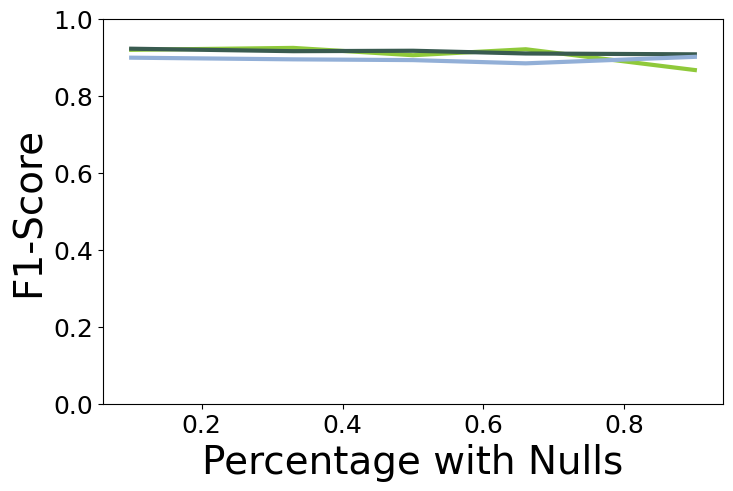

In [12]:
removalColor = '#8FC93A'
meanColor = '#395B50'
synColor = '#92AFD7'
'''
WDBC
-------
RAW DATA
WDBC
[0.916730551496088, 0.9167569391253603, 0.9387958809011441, 0.8951855711740178, 0.9287290267166428] ==> 0.9192
[0.9099385850420333, 0.9051110830421175, 0.9417460317460318, 0.9285797089245366, 0.9355376475376476] ==> 0.9242
[0.9100402521455153, 0.8988023088023087, 0.9118295739348371, 0.8942582741438576, 0.9108521303258146] ==> 0.9052
[0.9051648351648351, 0.9184701572936866, 0.9149450549450548, 0.9145818070818071, 0.9504029304029304] ==> 0.9207
[0.8966666666666667, 0.8733333333333333, 0.8666666666666666, 0.7966666666666666, 0.8999999999999998] ==> 0.8667
----------
[0.9122090677629979, 0.9146652081138752, 0.9399380147372506, 0.9082143808195005, 0.935412716419523] ==> 0.9221
[0.9148517738940761, 0.8957123189734675, 0.9370436714174959, 0.898483325617472, 0.932306481022336] ==> 0.9157
[0.91433027988421, 0.8865934504584171, 0.9395203340807425, 0.9088474522075976, 0.9349377927999896] ==> 0.9168
[0.9138621924790835, 0.8792930996022317, 0.9322608951089114, 0.8959548367158913, 0.9273647560806111] ==> 0.9097
[0.9111791674307721, 0.8579282185508117, 0.93014797926596, 0.9084559200688258, 0.9296996975618942] ==> 0.9075
----------
[0.846764023869287, 0.9181369098107911, 0.936009397106958, 0.8933752579457777, 0.8998462717589802] ==> 0.8988
[0.846764023869287, 0.9098838837670673, 0.939218131399073, 0.8760921491419161, 0.9006361045192881] ==> 0.8945
[0.8540367511420142, 0.8897749990603081, 0.9185065538257972, 0.8967372145748925, 0.9034977303398357] ==> 0.8925
[0.857143976013945, 0.882898157932749, 0.9067146499001589, 0.8767625090177857, 0.8968428133250356] ==> 0.8841
[0.8778936666545214, 0.8795000707365993, 0.9356280169694802, 0.9000162961762508, 0.9120364863368714] ==> 0.9010
'''
removal_wdbc = [.9192, 0.9242, 0.9052, 0.9207, 0.8667]
mean_wdbc = [.9221, 0.9157, 0.9168, 0.9097, 0.9075]
syn_filled_wdbc = [.8988, 0.8945, 0.8925, 0.8841, 0.9010]
print(np.mean(removal_wdbc))
print(np.mean(mean_wdbc))
print(np.mean(syn_filled_wdbc))
print(np.mean(syn_filled_wdbc) - np.mean(removal_wdbc))
print(np.mean(syn_filled_wdbc) - np.mean(mean_wdbc))

wdbc_x_vals_null = [0.1, 0.33, 0.5, 0.66, 0.9]

plt.plot(wdbc_x_vals_null, removal_wdbc,  label='Removal', color=removalColor, linewidth=3)
plt.plot(wdbc_x_vals_null, mean_wdbc, label='Mean Imputation', color=meanColor, linewidth=3)
plt.plot(wdbc_x_vals_null, syn_filled_wdbc, label='DB-PAC Imputation', color=synColor, linewidth=3)
plt.xlabel("Percentage with Nulls")
plt.ylabel("F1-Score")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.show()



0.41825999999999997
0.46365999999999996
0.28728
-0.13097999999999999
-0.17637999999999998


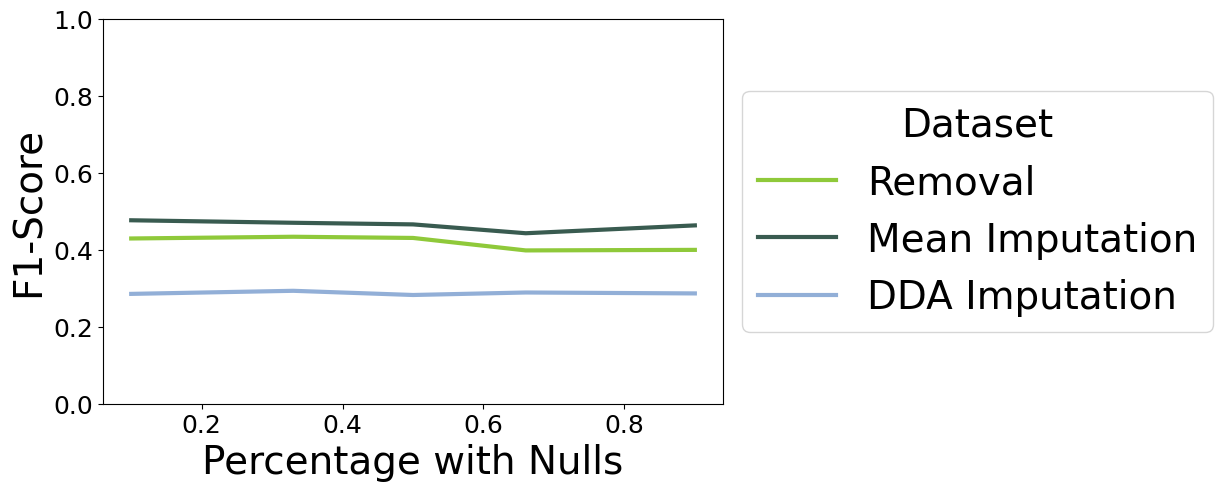

In [13]:
removalColor = '#8FC93A'
meanColor = '#395B50'
synColor = '#92AFD7'
'''
WDBC
-------
RAW DATA
WDBC
[0.916730551496088, 0.9167569391253603, 0.9387958809011441, 0.8951855711740178, 0.9287290267166428] ==> 0.9192
[0.9099385850420333, 0.9051110830421175, 0.9417460317460318, 0.9285797089245366, 0.9355376475376476] ==> 0.9242
[0.9100402521455153, 0.8988023088023087, 0.9118295739348371, 0.8942582741438576, 0.9108521303258146] ==> 0.9052
[0.9051648351648351, 0.9184701572936866, 0.9149450549450548, 0.9145818070818071, 0.9504029304029304] ==> 0.9207
[0.8966666666666667, 0.8733333333333333, 0.8666666666666666, 0.7966666666666666, 0.8999999999999998] ==> 0.8667
----------
[0.9122090677629979, 0.9146652081138752, 0.9399380147372506, 0.9082143808195005, 0.935412716419523] ==> 0.9221
[0.9148517738940761, 0.8957123189734675, 0.9370436714174959, 0.898483325617472, 0.932306481022336] ==> 0.9157
[0.91433027988421, 0.8865934504584171, 0.9395203340807425, 0.9088474522075976, 0.9349377927999896] ==> 0.9168
[0.9138621924790835, 0.8792930996022317, 0.9322608951089114, 0.8959548367158913, 0.9273647560806111] ==> 0.9097
[0.9111791674307721, 0.8579282185508117, 0.93014797926596, 0.9084559200688258, 0.9296996975618942] ==> 0.9075
----------
[0.846764023869287, 0.9181369098107911, 0.936009397106958, 0.8933752579457777, 0.8998462717589802] ==> 0.8988
[0.846764023869287, 0.9098838837670673, 0.939218131399073, 0.8760921491419161, 0.9006361045192881] ==> 0.8945
[0.8540367511420142, 0.8897749990603081, 0.9185065538257972, 0.8967372145748925, 0.9034977303398357] ==> 0.8925
[0.857143976013945, 0.882898157932749, 0.9067146499001589, 0.8767625090177857, 0.8968428133250356] ==> 0.8841
[0.8778936666545214, 0.8795000707365993, 0.9356280169694802, 0.9000162961762508, 0.9120364863368714] ==> 0.9010
'''
removal_surg = [.4292, 0.4337, 0.4306, 0.3982, 0.3996]
mean_surg = [.4765, 0.4700, 0.4658, 0.4428, 0.4632]
syn_filled_surg = [.2853, 0.2933, 0.2824, 0.2889, 0.2865]
print(np.mean(removal_surg))
print(np.mean(mean_surg))
print(np.mean(syn_filled_surg))
print(np.mean(syn_filled_surg) - np.mean(removal_surg))
print(np.mean(syn_filled_surg) - np.mean(mean_surg))

wdbc_x_vals_null = [0.1, 0.33, 0.5, 0.66, 0.9]

plt.plot(wdbc_x_vals_null, removal_surg,  label='Removal', color=removalColor, linewidth=3)
plt.plot(wdbc_x_vals_null, mean_surg, label='Mean Imputation', color=meanColor, linewidth=3)
plt.plot(wdbc_x_vals_null, syn_filled_surg, label='DDA Imputation', color=synColor, linewidth=3)
plt.xlabel("Percentage with Nulls")
plt.ylabel("F1-Score")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




In [11]:
surgical_removal = [0.4040, 0.3738, 0.3289, 0.5526, 0.3359]
surgical_mean = [0.4648, 0.3707, 0.4054, 0.6638, 0.4114]
surgical_dbPac = [0.3219, 0.2841, 0.0799, 0.5419, 0.2048]
